<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Imagine you're in charge of a website to optimise sales. You have the current version of the website, but aren't happy with it. The "Buy now" button is not obvious to the user, it's hidden away, so you want to try making it bigger and brighter, maybe that will increase conversion. But you also care about statistical rigour (an odd combination to be sure). So you set up your website so that half the people are directed to the old website, and half to one where you've made your change. You have data from both, and want to know, with confidence, "Does the change I made increase conversion?".

Now, A/B tests can test anything you want, but common ones are click through/conversion, bounce rate, and how long you spend on the page. For this example, let us assume we want to optimise conversion, which in our case is clicking the "Add to cart" button above.

Let us assume you have 1000 users, 550 were directed to site A, 450 to site B. In site A, 48 users converted. In site B, 56 users converted. Is this a statistically significant result?

- Step 1: Find $p_A$ and $p_B$
- Step 2: Use `binom` class from `scipy.stats`, use $p_A$ and $p_B$ values from previous step and determine the probability of having x number of click throughs. Plot the distributions for both webpages.
- Step 3: Use `norm` class from `scipy.stats` and similar to Step 2, plot the histogram of conversion rates using normal distribution approximation ($N_A\text{ ~ }(p_A, \sqrt{\frac{p_A(1-p_A)}{N_A}})$).
- Step 4: What is the chance that the actual CTR from B is higher than the CTR of A. Ie, the chance a draw from the B distribution above is greater than a draw from the A distribution. And is that significant? 
  To answer this, let us utilise the handy fact that the sum (or difference) of normally distributed random numbers is also a normal:

$$P(b-a) = \mathcal{N}(\mu_B - \mu_A, \sqrt{\sigma_A^2 + \sigma_B^2})$$
    First, get the z-score, and second, plot the proper distribution.
- Step 5: So what if we're not confident that we've done the math perfectly? Is there a way we can brute force a check? Draw 10000 samples of possible rates ($p_A$ and $p_B$) for a and b and chgeck how many times B>A.

In [17]:
num_a, num_b = 550, 450
click_a, click_b = 48, 56

rate_a, rate_b = click_a/num_a, click_b/num_b

print('Pr(A)= 48/550 =', rate_a, '\n\nrate B = 56/450 =', rate_b)

Pr(A)= 48/550 = 0.08727272727272728 

rate B = 56/450 = 0.12444444444444444


<BarContainer object of 60 artists>

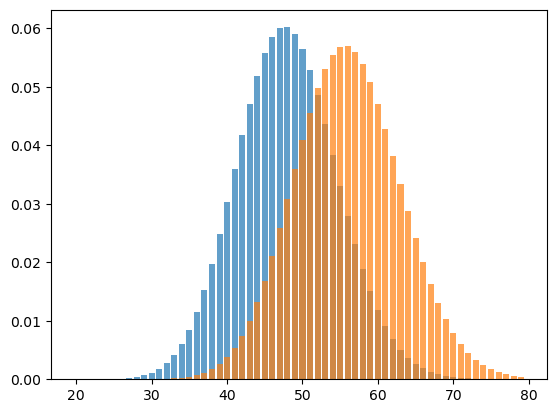

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

clicks = np.arange(20,80)

prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

plt.bar(clicks, prob_a, label='A', alpha=0.7)
plt.bar(clicks, prob_b, label='B', alpha=0.7)

In [8]:
p = .45
N = 550 

variance_of_binom = p*(1-p)*N
variance_of_binom

136.125

In [9]:
rate_a, rate_b

(0.08727272727272728, 0.12444444444444444)

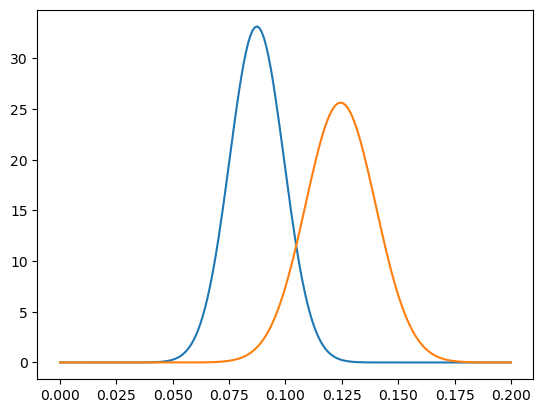

In [10]:
from scipy.stats import norm

std_a=np.sqrt(rate_a * (1-rate_a)/num_a)
std_b=np.sqrt(rate_b * (1-rate_b)/num_b)

click_rate = np.linspace(0,0.2, 200)
prob_a=norm(rate_a, std_a).pdf(click_rate)
prob_b=norm(rate_b, std_b).pdf(click_rate)

plt.plot(click_rate, prob_a, label='A')
plt.plot(click_rate, prob_b, label='B')

In [11]:
z_score = (rate_b-rate_a)/np.sqrt(std_a**2+std_b**2)
1-norm().cdf(z_score)

0.02940265017242183

p<0.05, we reject the null hypothesis and conclude that there is a statistically significant difference between the clicking ratios of two groups

In [12]:
n = 100000

rates_a = norm(rate_a, std_a).rvs(n)
rates_b = norm(rate_b, std_b).rvs(n)

b_better = (rates_b>rates_a).mean()

print(b_better)
print(1-b_better)

0.97019
0.029810000000000003
